# Udemy Courses Exploration

This is my first portfolio project :)

I'm very passionate about Udemy and online (continuous) education in general. Hopefully, I'll be able to extract some interesting insights from Kaggle datasets that countain data on Udemy courses.

This dataset contains detailed information on all available Udemy courses on Oct 10, 2022.
More info on the dataset can be found [here](https://www.kaggle.com/datasets/hossaingh/udemy-courses)

---

**Skills this project showcases:**
- Working with Pandas DataFrames
- Working with datetime objects
- Plotting with Seaborn
- Conditional string formatting in Python
- Using if/else statements and for loops
- My thinking process when facing a novel dataset
- Most importantly: Asking interesting and valuable questions and using data to answer them :)

## Imports and Preparation

In [1]:
import numpy as np 
import pandas as pd
import datetime

import matplotlib.pyplot as plt
plt.show()

import seaborn as sns
sns.set_theme()

In [2]:
course_df = pd.read_csv("/kaggle/input/udemy-courses/Course_info.csv")

## A first look at the data :)

In [3]:
print(f"The df has {course_df.shape[0]} rows and {course_df.shape[1]} columns.")

print(f"The df contains data on {course_df['id'].nunique()} unique courses.")

if course_df['id'].nunique() == course_df.shape[0]:
    print("There's exactly one row per course.")
else:
    print("There's not exactly one row per course.")

 ## So, on 10 Oct 2022, there was more than 200 thousand courses on Udemy!

The df has 209734 rows and 20 columns.
The df contains data on 209734 unique courses.
There's exactly one row per course.


In [4]:
## I always like using the ".head()" method with pd.DataFrame objects, ...
## ... for getting a quick overview of how my data is structured

course_df.head()

,id,title,is_paid,price,headline,num_subscribers,avg_rating,num_reviews,num_comments,num_lectures,content_length_min,published_time,last_update_date,category,subcategory,topic,language,course_url,instructor_name,instructor_url
0,4715.0,Online Vegan Vegetarian Cooking School,True,24.99,Learn to cook delicious vegan recipes. Filmed ...,2231.0,3.75,134.0,42.0,37.0,1268.0,2010-08-05T22:06:13Z,2020-11-06,Lifestyle,Food & Beverage,Vegan Cooking,English,/course/vegan-vegetarian-cooking-school/,Angela Poch,/user/angelapoch/
1,1769.0,The Lean Startup Talk at Stanford E-Corner,False,0.00,Debunking Myths of Entrepreneurship A startup ...,26474.0,4.50,709.0,112.0,9.0,88.0,2010-01-12T18:09:46Z,NaN,Business,Entrepreneurship,Lean Startup,English,/course/the-lean-startup-debunking-myths-of-en...,Eric Ries,/user/ericries/
2,5664.0,"How To Become a Vegan, Vegetarian, or Flexitarian",True,19.99,Get the tools you need for a lifestyle change ...,1713.0,4.40,41.0,13.0,14.0,82.0,2010-10-13T18:07:17Z,2019-10-09,Lifestyle,Other Lifestyle,Vegan Cooking,English,/course/see-my-personal-motivation-for-becomin...,Angela Poch,/user/angelapoch/
3,7723.0,How to Train a Puppy,True,199.99,Train your puppy the right way with Dr. Ian Du...,4988.0,4.80,395.0,88.0,36.0,1511.0,2011-06-20T20:08:38Z,2016-01-13,Lifestyle,Pet Care & Training,Pet Training,English,/course/complete-dunbar-collection/,Ian Dunbar,/user/ian-dunbar/
4,8157.0,Web Design from the Ground Up,True,159.99,Learn web design online: Everything you need t...,1266.0,4.75,38.0,12.0,38.0,569.0,2011-06-23T18:31:20Z,NaN,Design,Web Design,Web Design,English,/course/web-design-from-the-ground-up/,E Learning Lab,/user/edwin-ang-2/


## Questions I'll be focusing on

So, just based on observing the above output, I can form some interesting questions.

- **What are the top 5 courses with most subscribers?**
    - Per category?
        - Per category and per language?
- **What are the top 5 courses with best ratios of time passed since publishing and the number of subscribers?**
    - In other words, I'm interested in the fastest "growing" courses.
    - We could do this by calculating the number of subscribers per day, for each day since the course's publication date until the date of DFs creation (Oct 10, 2022)
        - Per category?
- **Who are the most popular instructors (let's see how to operationalize the instructor's popularity later)?**
- **Who are the most active instructios?**
- **Who are the most successful up-and-coming instructors?**
- **What are the most popular topics per each category, and how do the categories rank in popularity?**

- **What are the best predictors of a course's popularity?**
    - Des price a play a role in determining its popularity??
    - How about course's duration?

## Some more getting to know the data before we start answering these questions

In [5]:
## But before any of this, let's check how NAs are distributed across the df.

print(course_df.info())

## Columns mostly contain string ("object"), float or boolean datatypes :) 
## Good to know before we start working with dates!

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 209734 entries, 0 to 209733
Data columns (total 20 columns):
 #   Column              Non-Null Count   Dtype  
---  ------              --------------   -----  
 0   id                  209734 non-null  float64
 1   title               209734 non-null  object 
 2   is_paid             209734 non-null  bool   
 3   price               209734 non-null  float64
 4   headline            209707 non-null  object 
 5   num_subscribers     209734 non-null  float64
 6   avg_rating          209734 non-null  float64
 7   num_reviews         209734 non-null  float64
 8   num_comments        209734 non-null  float64
 9   num_lectures        209734 non-null  float64
 10  content_length_min  209734 non-null  float64
 11  published_time      209734 non-null  object 
 12  last_update_date    209597 non-null  object 
 13  category            209734 non-null  object 
 14  subcategory         209734 non-null  object 
 15  topic               208776 non-nul

In [6]:
print(course_df.isna().sum()) ## Most NAs are in the `topic` column (958). Not too many NAs overall

id                      0
title                   0
is_paid                 0
price                   0
headline               27
num_subscribers         0
avg_rating              0
num_reviews             0
num_comments            0
num_lectures            0
content_length_min      0
published_time          0
last_update_date      137
category                0
subcategory             0
topic                 958
language                0
course_url              0
instructor_name         5
instructor_url        427
dtype: int64


One more thing before we start. 

To get a sense of the timeframe of our data, let's see what's the "oldest" data point that we have - when was the oldest course published. 

Let's also see the publication date of the "youngest" course, and the most recent `last_update_date` that we have.

In [7]:
pd.to_datetime(course_df['published_time']).describe(datetime_is_numeric = True)

## So, min for `course_df['published_time']` is 2010-01-12 (12 January 2010). 
## It's a bit strange, since I can see that Udemy was officially founded on May 11, 2010 (source: Wiki).
## Otherwise, I see that the dataset contains courses released throughout Udemy's existance, up to October 2022.

count                                 209734
mean     2020-02-06 16:13:05.572520704+00:00
min                2010-01-12 18:09:46+00:00
25%      2018-12-08 20:58:21.750000128+00:00
50%                2020-08-21 02:41:58+00:00
75%         2021-08-30 21:35:41.500000+00:00
max                2022-10-05 17:04:08+00:00
Name: published_time, dtype: object

In [8]:
pd.to_datetime(course_df['last_update_date']).describe(datetime_is_numeric = True)

## The most recent "last_update_date" is Oct 10, 2022. 
## This just confirms the info given by the DF's creator, that:
## "This dataset contains detailed information on all available Udemy courses on Oct 10, 2022"

count                           209597
mean     2020-10-26 22:44:29.706150912
min                2012-10-31 00:00:00
25%                2020-02-19 00:00:00
50%                2021-04-28 00:00:00
75%                2022-03-17 00:00:00
max                2022-10-10 00:00:00
Name: last_update_date, dtype: object

Let's quickly zoom in on courses published before May 11, 2010 (official founding data for Udemy)

In [9]:
## Let's make our lives easier already by changing date columns to an appropriate format:

course_df['published_time'] = pd.to_datetime(course_df['published_time'])
course_df['last_update_date'] = pd.to_datetime(course_df['last_update_date'])

print(f"There's only {course_df[course_df['published_time'] < '2010-05-11'].shape[0]} such courses")

course_df[course_df['published_time'] < '2010-05-11']

There's only 2 such courses


,id,title,is_paid,price,headline,num_subscribers,avg_rating,num_reviews,num_comments,num_lectures,content_length_min,published_time,last_update_date,category,subcategory,topic,language,course_url,instructor_name,instructor_url
1,1769.0,The Lean Startup Talk at Stanford E-Corner,False,0.00,Debunking Myths of Entrepreneurship A startup ...,26474.0,4.50,709.0,112.0,9.0,88.0,2010-01-12 18:09:46+00:00,NaT,Business,Entrepreneurship,Lean Startup,English,/course/the-lean-startup-debunking-myths-of-en...,Eric Ries,/user/ericries/
6,2762.0,Simple Strategy for Swing Trading the Stock Ma...,True,39.99,Use my favorite Technical Indicator and the Tr...,3309.0,3.85,958.0,241.0,8.0,80.0,2010-04-14 16:32:46+00:00,2019-03-07,Finance & Accounting,Investing & Trading,Swing Trading,English,/course/swing-trading-the-stock-market/,Tom Watson,/user/tomwatson/


**Mystery solved (source: Wiki):**
    
> The site was launched by Bali, Oktay Caglar and Gagan Biyani in early 2010.

In [10]:
## Let's also see which unique categories/subcategories we have.
## Let's assign a number to each category, and let's print each category and all of its subcategories...
## ... in aplhabetical order
## Let's apply some basic formatting to make everything look nice :)

counter = 1

## for each category
for category in sorted(list(course_df['category'].unique())):
    
    print(f"CATEGORY {counter}: {category}")
    print("SUBCATEGORIES:")
    
    ## Print each ot its subcategories
    ## I needed to use list() twice here - I'd get an array when I'd use it just once. Had to use indexing too.
    for subcategory in sorted(list(list(course_df[course_df['category'] == category].
                                        groupby('category')['subcategory'].unique()[0]))): 
        
        print(f"- {subcategory}")
        
    print('-------------------')
    
    counter += 1

CATEGORY 1: Business
SUBCATEGORIES:
- Business Analytics & Intelligence
- Business Law
- Business Strategy
- Communication
- E-Commerce
- Entrepreneurship
- Human Resources
- Industry
- Management
- Media
- Operations
- Other Business
- Project Management
- Real Estate
- Sales
-------------------
CATEGORY 2: Design
SUBCATEGORIES:
- 3D & Animation
- Architectural Design
- Design Tools
- Fashion Design
- Game Design
- Graphic Design & Illustration
- Interior Design
- Other Design
- User Experience Design
- Web Design
-------------------
CATEGORY 3: Development
SUBCATEGORIES:
- Data Science
- Database Design & Development
- Game Development
- Mobile Development
- No-Code Development
- Programming Languages
- Software Development Tools
- Software Engineering
- Software Testing
- Web Development
-------------------
CATEGORY 4: Finance & Accounting
SUBCATEGORIES:
- Accounting & Bookkeeping
- Compliance
- Cryptocurrency & Blockchain
- Economics
- Finance
- Finance Cert & Exam Prep
- Financial

In [11]:
## Which languages are present in the df? How many courses are there per language?

print(f"Udemy courses are taught in {course_df['language'].nunique()} languages.")
print('\n')
print("Top 10 languages with most courses:")

pd.DataFrame(course_df.groupby('language')['id'].count()\
             .sort_values(ascending = False)\
             .head(10))\
    .reset_index()\
    .rename(columns={'id':'Total_Numbers'})

## Didn't expect to see Portuguese at No. 2 :) Way to go, Portugal :)

Udemy courses are taught in 79 languages.


Top 10 languages with most courses:


,language,Total_Numbers
0,English,123921
1,Portuguese,18471
2,Spanish,17428
3,Turkish,8100
4,Japanese,7006
5,German,6101
6,French,5465
7,Arabic,5197
8,Italian,3637
9,Russian,2686


## Top 5 courses with most subscribers?

Now, let's return to our questions

In [12]:
course_df[['title', 'instructor_name', 'num_subscribers', 'published_time']]\
    .sort_values(by = 'num_subscribers', ascending = False).head(5)

## I've taken the second one - by Jose Portilla :)

## Most of these courses are made by well established instructors - and courses themselves seem to have had
## quite some time to establish themselves and gain subscribers

## It would be interesting to see who among the instructors that started providing courses very recently is ...
## ... the most successful in terms of attracting subscribers...

,title,instructor_name,num_subscribers,published_time
396,Java Tutorial for Complete Beginners,John Purcell,1752364.0,2012-09-30 20:11:57+00:00
10724,2022 Complete Python Bootcamp From Zero to Her...,Jose Portilla,1612862.0,2015-10-12 21:42:53+00:00
16288,Microsoft Excel - Excel from Beginner to Advanced,Kyle Pew,1108811.0,2016-03-16 21:31:03+00:00
10174,Automate the Boring Stuff with Python Programming,Al Sweigart,1056369.0,2015-09-21 21:10:01+00:00
20252,Machine Learning A-Z™: Hands-On Python & R In ...,Kirill Eremenko,896340.0,2016-09-13 21:43:44+00:00


Text(0.5, 0, "Top 5 most popular courses' names")

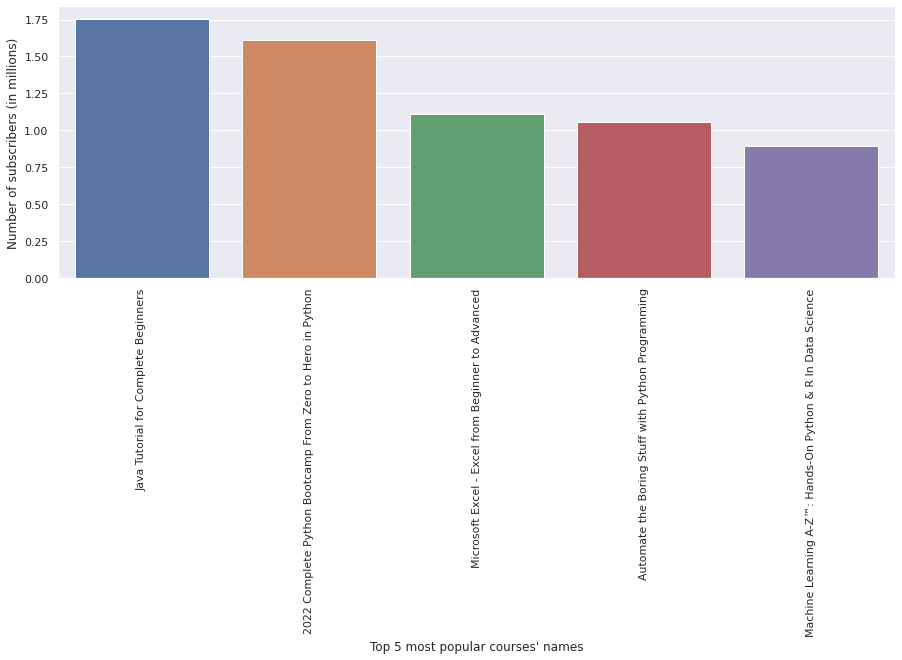

In [13]:
## Let's quickly plot this with seaborn

top_courses = course_df[['title', 'num_subscribers']].\
                        sort_values(by = 'num_subscribers', ascending = False).\
                        head(5)

sns.set(rc = {"figure.figsize": (15, 5)}) ## Setting figure size

plot1 = sns.barplot(x = top_courses['title'], y = top_courses["num_subscribers"] / 1000000)
plot1.tick_params(axis = 'x', rotation=90)
plot1.set_ylabel('Number of subscribers (in millions)')
plot1.set_xlabel("Top 5 most popular courses' names")

## Top 5 fastest growing courses

In [14]:
course_df['days_since_publication'] = datetime.date(2022, 10, 10) - course_df['published_time'].dt.date
print(course_df['days_since_publication'][:5]) ## let's have a quick look at the results

print('\n')

## Let's turn the results into integers
course_df['days_since_publication'] = course_df['days_since_publication'].dt.days
print(course_df['days_since_publication'][:5]) ## let's have a quick look again :)

print('\n')

print(course_df['days_since_publication'].dtypes)

0   4449 days
1   4654 days
2   4380 days
3   4130 days
4   4127 days
Name: days_since_publication, dtype: timedelta64[ns]


0    4449
1    4654
2    4380
3    4130
4    4127
Name: days_since_publication, dtype: int64


int64


In [15]:
## Let's just quickly make sure that no courses in our df were published after 10 Oct, 2022 ...
## (this shouldn't be possible), and that everything makes sense

course_df['days_since_publication'].describe() 

count    209734.000000
mean        976.922955
std         761.644872
min           5.000000
25%         406.000000
50%         780.000000
75%        1402.000000
max        4654.000000
Name: days_since_publication, dtype: float64

In [16]:
course_df['subscribers_per_day'] = course_df['num_subscribers'] / course_df['days_since_publication'] 
course_df['subscribers_per_day'][:5] ## let's just take a quick look :)

0    0.501461
1    5.688440
2    0.391096
3    1.207748
4    0.306760
Name: subscribers_per_day, dtype: float64

In [17]:
course_df[['title', 'instructor_name', 'subscribers_per_day', 'published_time']]\
    .sort_values(by = 'subscribers_per_day', ascending = False).head(5)

## Impressive work @ Dr. ANgela Yu :)

,title,instructor_name,subscribers_per_day,published_time
84101,100 Days of Code: The Complete Python Pro Boot...,Dr. Angela Yu,891.328169,2020-10-30 17:18:33+00:00
10724,2022 Complete Python Bootcamp From Zero to Her...,Jose Portilla,631.257143,2015-10-12 21:42:53+00:00
98405,[NEW] Ultimate AWS Certified Cloud Practitione...,Stephane Maarek | AWS Certified Cloud Practiti...,613.775058,2020-06-04 15:59:21+00:00
208170,Power BI Fundamental - Do Básico ao Avançado,Stefano Larmelina,589.277778,2022-09-22 14:40:45+00:00
39113,The Complete 2022 Web Development Bootcamp,Dr. Angela Yu,533.316736,2018-10-25 21:34:15+00:00


Text(0.5, 0, 'Top 5 courses')

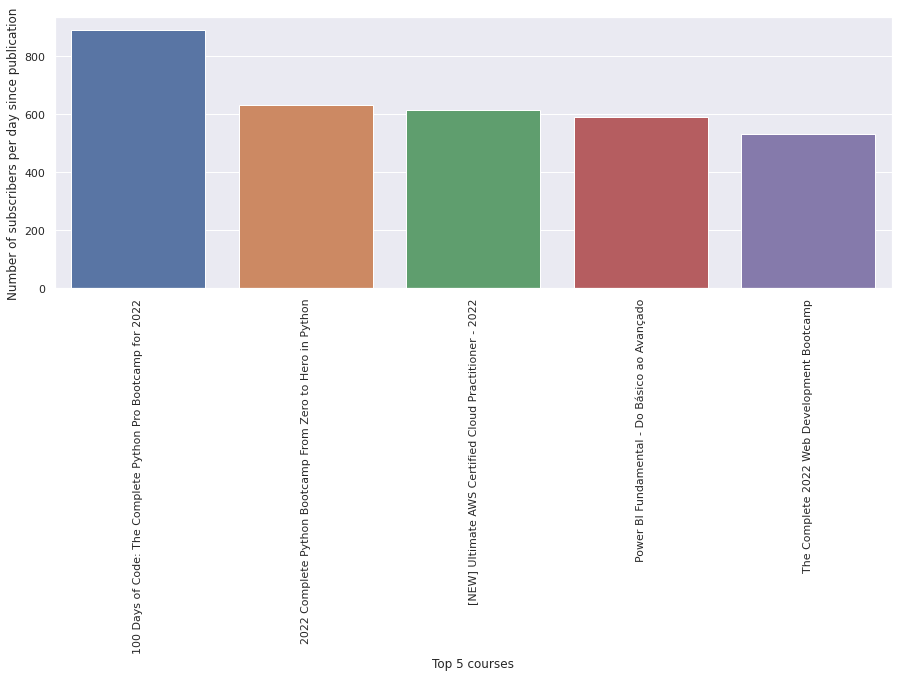

In [18]:
## Let's quickly plot this with seaborn

top_sub_per_day = course_df[['title', 'subscribers_per_day']].\
                           sort_values(by = 'subscribers_per_day', ascending = False).\
                           head(5)

sns.set(rc = {"figure.figsize": (15, 5)}) ## Setting figure size

plot2 = sns.barplot(x = top_sub_per_day['title'], y = top_sub_per_day["subscribers_per_day"])
plot2.tick_params(axis = 'x', rotation=90)
plot2.set_ylabel('Number of subscribers per day since publication')
plot2.set_xlabel("Top 5 courses")